<a href="https://colab.research.google.com/github/jovianparco/Numerical-Methods/blob/main/Copy_of_Coding_Activity_3_Roots_of_Linear_Equation_Coding_Activity_3_Roots_of_Linear_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as opt
import matplotlib.pyplot as plt

### ACTIVITY 2.1
1. Identify two more polynomials preferably orders higher than 2 and two transcendental functions. Write them in LaTex.
2. Plot their graphs you may choose your own set of pre-images.
3. Manually solve for their roots and plot them along the graph of the equation.

$$ F(x)=2x^3-5x^2 $$

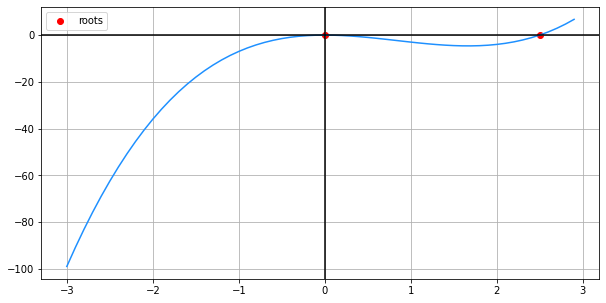

In [ ]:
def f(x): #function
  return 2*x**3-5*x**2
X = np.arange(-3,3,0.1,dtype=float) #boundary, incerement in the graph
Y = f(X)
x0, x1 = 0,2.5 #roots of the function
# Grid in the graph
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
###  the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
### plot the roots of the equation
plt.scatter([x0,x1],[0,0], c='red', label='roots')

plt.legend()
plt.show()

$$ F(x)=8x^3+24x^2-32x $$

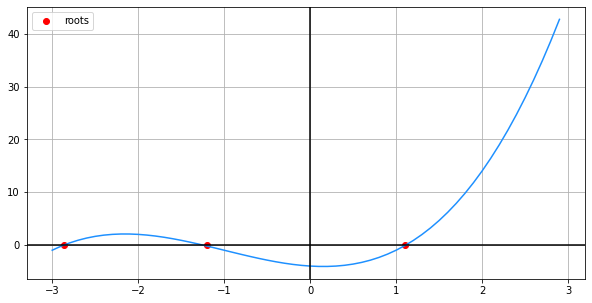

In [ ]:
def f(x): #function
  return x**3+3*x**2-x-4
X = np.arange(-3,3,0.1,dtype=float) #boundary, incerement in the graph
Y = f(X)
x0, x1, x2 = -2.86, 1.1, -1.2 #roots of the function
### Now let's plot the images against the pre-images
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
### show the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
###  plot the roots of the equation
plt.scatter([x0,x1,x2],[0,0,0], c='red', label='roots')

plt.legend()
plt.show()

$$F(x)= \pi x^2 + 3$$

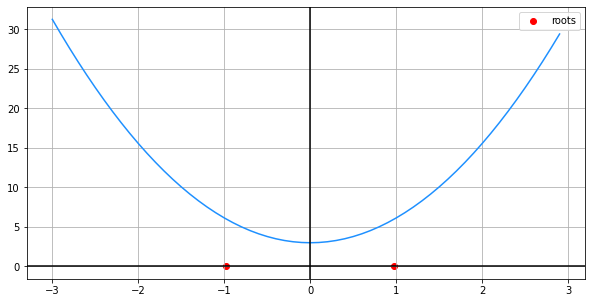

In [ ]:
def f(x): #function
  return np.pi*x**2+3
X = np.arange(-3,3,0.1,dtype=float) #boundary, incerement in the graph
Y = f(X)
x0, x1 = np.sqrt(3/np.pi),-np.sqrt(3/np.pi) 
###  plot the images against the pre-images
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
###  show the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
###  plot the roots of the equation
plt.scatter([x0,x1],[0,0], c='red', label='roots')

plt.legend()
plt.show()

$$F(x)= \log{x}+1$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


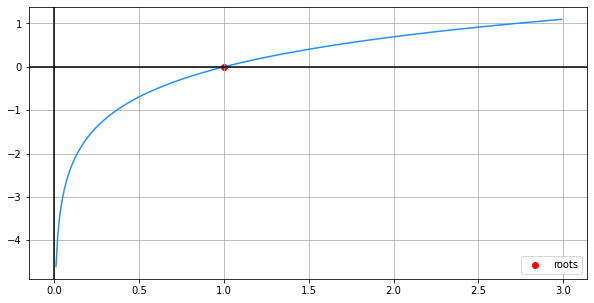

In [ ]:
def f(x): #function
  return np.log(x)
X = np.arange(-3,3,0.01,dtype=float) #boundary, incerement in the graph
Y = f(X)
x0 = 1 #roots of the function
###  plot the images against the pre-images
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
###  show the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
### plot the roots of the equation
plt.scatter([x0],[0], c='red', label='roots')

plt.legend()
plt.show()

##MODULE FOR ROOTS OF LINEAR EQUATION

### Created Brute Force Algorithm ($F(x)=0$)



In [ ]:
def brute_forcefx(funct,start,n_roots,epochs=100,tol=1.0e-06,incre=1):
  roots = []
  for epoch in range(epochs):
    if np.allclose(0,funct(start),atol=tol):
      roots.append(start)
      if len(roots) == n_roots:
        return roots, epoch
        break
    if epoch == epochs-1:
      epoch+1
      return roots, epoch
      break
    start+=incre

#### Test ####
def f(x):
  return  np.sin(2*x)-np.cos(2*x)
 
def g(x):
  return x**2+x-2
       
shit = brute_forcefx(f,-3,3,epochs=10000,tol=1.0e-02,incre=.01)

### Created Brute Force Algorithm (In terms of X)

In [ ]:
def brute_forcef(funcs,n_roots,epochs=100,tol=1.0e-05):
  epoch_list = []
  roots = []
  for func in funcs:
    x = 0
    for epoch in range(epochs):
      x_prime = func(x)
      if np.allclose(x, x_prime,tol):
        roots.append(x_prime)
        epoch_list.append(epoch)
        break
      x = x_prime
    if len(roots) == n_roots:
      return roots, epoch_list
      break
  if len(roots) < n_roots:
    return roots, epoch_list

### Created Newton-Raphson Algorithm

In [ ]:
def newton_raphson(funct, N_roots, epochs = 100, start = 0, end = 100, rnd_off = 3, Print = False):

  x_inits = range(start, end, 1) #range of x
  
  roots = []
  epochs_re = []
  root_epoch = []
  root_epoch_fi = []

  # loop for finding the root
  for x_init in x_inits:
    if len(roots) == N_roots:
      break
    x = x_init
    for epoch in range(epochs):
      derivative = ((funct(x + .1e-6)  - funct(x))/(.1e-6)) # Derivative formula

      if derivative == 0: # catch statement if derivative is equal to zero
        print("Derivative is equal to zero cannot proceed with operation")
        break

      x_prime = x - (funct(x)/derivative)
      if np.allclose(x, x_prime):
        root_epoch.append([round(x,rnd_off),epoch])
        break

      x = x_prime

 # selects 1 root of similar roots and its epoch
  for i in range(len(root_epoch)):
    for l in range(len(root_epoch)):
      if (i == l):
        break
      if (root_epoch[i][0] == root_epoch[l][0]):
          del root_epoch[l]
          root_epoch.insert(0,[0])

  #gets the root and epoch of the equation
  for x in range(len(root_epoch)):
    if any(root_epoch[x]) == True:
      root_epoch_fi.append(root_epoch[x])

  #separate the roots and epoch and add them in their respective list
  if N_roots <= len(root_epoch_fi):
      for elem in range(N_roots):  
        roots.append(root_epoch_fi[elem][0])
        epochs_re.append(root_epoch_fi[elem][1])
  else:
      for elem in range(len(root_epoch_fi)):  
        roots.append(root_epoch_fi[elem][0])
        epochs_re.append(root_epoch_fi[elem][1])

 # Catch statement when there is no roots found
  if len(roots) == False:
    print(f"There are no roots found, please readjust arguments, Expected Number of Roots:{N_roots}, start:{start}, end:{end}, or epochs:{epochs} or check the input function.")
    return f'ERROR! Expected is {N_roots}, while returend is {len(roots)}'

  # Prints the root/s and its epoch where it was found
  if Print == True:
    print(f'  Roots   |   Epochs ')
    for num in range(len(roots)):
     print(f'  {roots[num]}   |     {epochs_re[num]}')
  
  else:
    return epochs_re, roots



### Package and Module with examples

In [ ]:
from package_san import module_one

package_san was used to import the module_one that consists different function of the roots of linear equations which are in terms Brute Force Algorithm ( F(x)=0 ), Brute Force Algorithm (In terms of X) ,and Newton-Raphson Algorithm. 

In [ ]:
def f(x): return x**2+x-2
module_one.brute_forcefx(f,0,2,epochs=100,tol=1.0e-06,incre=1)
## output : ([-2, 1.0000000000000007], 30)  

module_one was called and the function inside that was created was named brute_forcefx so that the function created can be easily used and not to code repeatedly through out the process. The output consist of the roots in a list type where the elements are integers, the epochs are integer type.

In [ ]:
def f1(x): return 2-x**2
def f2(x): return np.sqrt(2-x)
f = [f1, f2]
module_one.brute_forcef(f,2,epochs=100,tol=1.0e-05)
## output: ([-2, 1.00000172977337], [2, 18])

module_one was called and the function inside that was created was named brute_forcef so that the function created can be easily used and not to code repeatedly through out the process. The output consist of the roots in a list type where the elements are integers, the epochs are also in a list with element as integers.

In [ ]:
def f(x): return 2*x**2 - 5*x - 3
module_one.newton_raphson(f,2, Print = True)
## output: 
  ## Roots   |   Epochs 
  ## -0.5   |     6
   ## 3.0   |     9

module_one was called and the function inside that was created was named newton_raphson so that the function created can be easily used and not to code repeatedly through out the process. This function finds the root of some equations using the Newton-Raphson method. The output of the function when Print = False is a tuple in which inside the tuple the list of roots and epochs are incased. The order of the list is the list of epochs followed by the list of roots. If Print = True there would be a side-by-side visualization of the roots and epochs.